In [1]:
import os
import ast
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as img
from ultralytics import YOLO

%matplotlib inline

In [2]:
ROOT_PATH = Path(os.getcwd()).parent.as_posix()
DATASET_PATH = Path(ROOT_PATH, "datasets/storm-damage-detection/working/sdd/sdd.yaml").as_posix()
RUN_PATH = Path(ROOT_PATH, "runs").as_posix()
PRETRAINED_PATH = Path(ROOT_PATH, "pretrained").as_posix()
TEST_INPUTS_DIR = Path(ROOT_PATH, "datasets/storm-damage-detection/working/sdd/test/images").as_posix()

## Training

In [3]:
model_name = "yolov8s.pt" # yolov8n.pt yolov8s.pt yolov8m.pt yolov8l.pt yolov8x.pt
model = YOLO(model_name, task="detect")
model.info()

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 33.6MB/s]


YOLOv8s summary: 225 layers, 11166560 parameters, 0 gradients, 28.8 GFLOPs


(225, 11166560, 0, 28.816844800000002)

In [4]:
train_results = model.train(
    data=DATASET_PATH, 
    epochs=1000, 
    imgsz=512,
    project=RUN_PATH
)

Ultralytics YOLOv8.1.24 🚀 Python-3.12.2 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/Jia Herng/Documents/Jia Herng Docs/projects/storm-damage-detection/datasets/storm-damage-detection/working/sdd/sdd.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=C:/Users/Jia Herng/Documents/Jia Herng Docs/projects/storm-damage-detection/runs, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, au

train: Scanning C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\datasets\storm-damage-detection\working\sdd\t

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 34, len(boxes) = 2746. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\datasets\storm-damage-detection\working\sdd\val


Plotting labels to C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train5
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      2.95G      2.028      5.032      1.667        285        512: 100%|██████████| 9/9 [00:04<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         18        419      0.138      0.177     0.0887     0.0499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      2.84G      1.586      2.337      1.347        382        512: 100%|██████████| 9/9 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         18        419      0.642      0.271      0.161     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      2.67G      1.297      1.612      1.204        322        512: 100%|██████████| 9/9 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         18        419       0.42      0.197      0.214      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      3.01G       1.25      1.317      1.145        609        512: 100%|██████████| 9/9 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]

                   all         18        419      0.515      0.293      0.262      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      2.77G      1.213      1.307      1.138        405        512: 100%|██████████| 9/9 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all         18        419      0.427      0.335      0.255      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      3.27G      1.225      1.284      1.143        532        512: 100%|██████████| 9/9 [00:01<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         18        419       0.36      0.354      0.336      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      2.73G      1.167      1.282      1.143        476        512: 100%|██████████| 9/9 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         18        419      0.201      0.453       0.23      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      2.76G      1.178      1.133      1.104        483        512: 100%|██████████| 9/9 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]


                   all         18        419      0.283      0.439      0.291      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      2.84G      1.128      1.126      1.097        332        512: 100%|██████████| 9/9 [00:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         18        419      0.369      0.395      0.359      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      2.74G      1.187      1.197      1.116        427        512: 100%|██████████| 9/9 [00:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         18        419      0.507      0.349      0.373      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      2.93G      1.162      1.114      1.136        584        512: 100%|██████████| 9/9 [00:01<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         18        419       0.64      0.299      0.337       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      3.11G      1.197       1.19      1.151        233        512: 100%|██████████| 9/9 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all         18        419      0.255      0.466      0.284      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      3.04G      1.119      1.119      1.116        348        512: 100%|██████████| 9/9 [00:01<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         18        419       0.33      0.494      0.309       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000       2.8G      1.107      1.126      1.109        418        512: 100%|██████████| 9/9 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         18        419      0.352      0.525      0.331      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      2.84G      1.127      1.086      1.085        449        512: 100%|██████████| 9/9 [00:01<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         18        419      0.279      0.662        0.3      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000       2.8G      1.231      1.142      1.141        380        512: 100%|██████████| 9/9 [00:01<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         18        419      0.253      0.381      0.272      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      2.74G      1.142      1.153       1.13        461        512: 100%|██████████| 9/9 [00:01<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         18        419      0.308      0.627      0.325       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      2.75G      1.113      1.062      1.126        279        512: 100%|██████████| 9/9 [00:01<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         18        419      0.252      0.576      0.297      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000       2.8G      1.123      1.015      1.115        415        512: 100%|██████████| 9/9 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         18        419      0.288      0.411      0.283      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      2.76G       1.11     0.9763      1.087        382        512: 100%|██████████| 9/9 [00:01<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         18        419      0.585      0.351      0.336      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      2.92G      1.121      1.036      1.098        433        512: 100%|██████████| 9/9 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         18        419       0.27      0.473      0.317      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      2.85G      1.081     0.9767      1.085        393        512: 100%|██████████| 9/9 [00:01<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         18        419      0.301      0.496      0.348      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      3.03G      1.041      0.923      1.074        426        512: 100%|██████████| 9/9 [00:01<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         18        419      0.596      0.322      0.357      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      2.97G      1.096      1.004      1.094        415        512: 100%|██████████| 9/9 [00:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         18        419       0.58      0.454      0.353      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      2.77G      1.123     0.9652       1.14        414        512: 100%|██████████| 9/9 [00:01<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         18        419       0.35      0.483      0.396      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      2.94G      1.106      0.974      1.098        348        512: 100%|██████████| 9/9 [00:01<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         18        419      0.492      0.476      0.451      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      2.74G      1.115     0.9579      1.102        422        512: 100%|██████████| 9/9 [00:01<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         18        419       0.48      0.503       0.43      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      2.91G      1.045     0.9294      1.064        422        512: 100%|██████████| 9/9 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         18        419      0.305       0.58       0.34      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000       2.9G     0.9891     0.8816      1.062        498        512: 100%|██████████| 9/9 [00:01<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         18        419      0.389      0.456      0.388      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      3.19G      1.085     0.9257      1.073        602        512: 100%|██████████| 9/9 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]

                   all         18        419      0.392      0.413      0.395      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      2.86G      1.043     0.9079      1.095        475        512: 100%|██████████| 9/9 [00:01<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         18        419      0.369      0.306      0.364      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      2.75G      1.093     0.8952      1.105        410        512: 100%|██████████| 9/9 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         18        419       0.24      0.514      0.299      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      2.76G     0.9898     0.8989       1.06        316        512: 100%|██████████| 9/9 [00:01<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         18        419      0.335      0.583      0.392      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      2.86G     0.9844     0.8017      1.051        441        512: 100%|██████████| 9/9 [00:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         18        419      0.331      0.441      0.377      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      2.85G       1.02      0.869      1.074        493        512: 100%|██████████| 9/9 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         18        419      0.329      0.446      0.385      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000       2.9G      1.086     0.9575       1.11        619        512: 100%|██████████| 9/9 [00:01<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]

                   all         18        419      0.409      0.437      0.397      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      3.02G      1.014     0.8871      1.061        384        512: 100%|██████████| 9/9 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         18        419      0.361      0.495      0.408        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      2.99G     0.9873     0.8796      1.049        362        512: 100%|██████████| 9/9 [00:01<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         18        419      0.287      0.517      0.394      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      2.66G      1.027     0.9051      1.069        254        512: 100%|██████████| 9/9 [00:01<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         18        419      0.456       0.44      0.392      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      2.93G     0.9943     0.8473       1.05        463        512: 100%|██████████| 9/9 [00:01<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         18        419      0.378      0.446      0.366      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      2.92G      1.017     0.8523      1.066        449        512: 100%|██████████| 9/9 [00:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         18        419      0.297      0.534      0.349      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      3.03G      1.003     0.8672      1.059        290        512: 100%|██████████| 9/9 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]


                   all         18        419      0.295       0.56      0.362      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      2.81G      1.001     0.8598      1.062        325        512: 100%|██████████| 9/9 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         18        419      0.312      0.626      0.336      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      2.75G      1.004     0.8278      1.067        576        512: 100%|██████████| 9/9 [00:01<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         18        419      0.496       0.56       0.39      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      2.91G      1.025     0.8388      1.087        483        512: 100%|██████████| 9/9 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all         18        419      0.374      0.603      0.372      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      3.32G      1.003     0.7786      1.063        593        512: 100%|██████████| 9/9 [00:01<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         18        419      0.347       0.56      0.353      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      2.77G     0.9793     0.7824       1.04        536        512: 100%|██████████| 9/9 [00:01<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         18        419      0.417      0.575      0.392      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      3.07G      1.005     0.7875      1.069        483        512: 100%|██████████| 9/9 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         18        419      0.356      0.563      0.405      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      3.11G      1.006     0.7917      1.052        421        512: 100%|██████████| 9/9 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         18        419      0.359      0.447      0.357       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      2.75G     0.9958     0.8018      1.057        311        512: 100%|██████████| 9/9 [00:01<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         18        419       0.38      0.411      0.356      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      2.69G     0.9998     0.7958      1.067        406        512: 100%|██████████| 9/9 [00:01<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         18        419      0.326      0.536      0.358      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      2.95G      1.006     0.7974      1.065        296        512: 100%|██████████| 9/9 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]


                   all         18        419      0.408      0.401       0.37      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      3.02G     0.9653     0.7673      1.038        425        512: 100%|██████████| 9/9 [00:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         18        419      0.381      0.493      0.392      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      2.79G     0.9594     0.7709      1.035        336        512: 100%|██████████| 9/9 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         18        419       0.46      0.382      0.407      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000       3.1G     0.9534     0.7456      1.023        313        512: 100%|██████████| 9/9 [00:01<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all         18        419      0.346      0.447      0.394       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      3.13G     0.9732     0.7476      1.041        453        512: 100%|██████████| 9/9 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         18        419      0.273       0.49      0.349      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      2.86G     0.9976     0.7588      1.052        344        512: 100%|██████████| 9/9 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         18        419      0.327      0.369      0.349      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000       2.9G      0.997     0.7533      1.042        503        512: 100%|██████████| 9/9 [00:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         18        419      0.317      0.432      0.368      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      2.75G     0.9668     0.7346      1.046        419        512: 100%|██████████| 9/9 [00:01<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         18        419      0.438      0.415      0.411      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      2.93G     0.9559     0.7304      1.029        364        512: 100%|██████████| 9/9 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         18        419       0.37      0.472      0.388      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      2.75G     0.9596      0.728      1.041        439        512: 100%|██████████| 9/9 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         18        419      0.342      0.465       0.33      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      2.93G     0.9681      0.731      1.039        656        512: 100%|██████████| 9/9 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all         18        419      0.257      0.556      0.301      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      2.66G     0.9197      0.681      1.007        450        512: 100%|██████████| 9/9 [00:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         18        419      0.295      0.527      0.351      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      2.77G     0.9318     0.6947      1.031        505        512: 100%|██████████| 9/9 [00:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all         18        419      0.351      0.464      0.363      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      2.92G      0.958     0.6981      1.015        357        512: 100%|██████████| 9/9 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         18        419      0.375      0.478      0.372      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      2.73G      1.007     0.7363      1.061        473        512: 100%|██████████| 9/9 [00:01<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         18        419      0.368      0.438      0.345      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      3.04G     0.9706     0.7275       1.04        409        512: 100%|██████████| 9/9 [00:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         18        419      0.311      0.531      0.372      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      2.97G     0.9618     0.7039      1.041        471        512: 100%|██████████| 9/9 [00:01<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         18        419      0.326      0.477      0.374      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      3.01G     0.9365     0.6835      1.028        493        512: 100%|██████████| 9/9 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         18        419      0.486      0.488      0.404      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      2.84G     0.9413      0.684      1.028        480        512: 100%|██████████| 9/9 [00:01<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]


                   all         18        419      0.327      0.491      0.364      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      2.76G     0.8892     0.6621      1.014        333        512: 100%|██████████| 9/9 [00:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         18        419      0.297      0.453      0.358      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      3.02G     0.9126     0.6989      1.031        309        512: 100%|██████████| 9/9 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         18        419      0.346      0.525      0.397      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      2.73G     0.9186     0.6659      1.017        397        512: 100%|██████████| 9/9 [00:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all         18        419      0.322       0.56      0.378       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      3.01G     0.8996     0.6646      1.016        303        512: 100%|██████████| 9/9 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         18        419      0.408      0.453      0.366      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      2.74G     0.9384     0.6898      1.031        352        512: 100%|██████████| 9/9 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all         18        419      0.418      0.424      0.357      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000       2.8G     0.9218     0.6694      1.006        379        512: 100%|██████████| 9/9 [00:01<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         18        419       0.49      0.503      0.451      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      2.99G     0.8802     0.6388     0.9975        371        512: 100%|██████████| 9/9 [00:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         18        419      0.522       0.39      0.394      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      2.98G     0.9021     0.6795      1.011        300        512: 100%|██████████| 9/9 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         18        419      0.691      0.327      0.369      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      2.87G     0.9207     0.6792      1.016        503        512: 100%|██████████| 9/9 [00:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all         18        419      0.323       0.39      0.416      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      3.03G       0.94     0.6759      1.038        508        512: 100%|██████████| 9/9 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         18        419      0.416       0.52      0.414      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000       2.9G     0.8706     0.6484      1.005        406        512: 100%|██████████| 9/9 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         18        419      0.518      0.399      0.384      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      2.76G     0.8773     0.6146          1        390        512: 100%|██████████| 9/9 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         18        419      0.602      0.395      0.396       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      2.76G     0.9089     0.6417      1.007        351        512: 100%|██████████| 9/9 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         18        419      0.325      0.549      0.386      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      2.77G     0.8836     0.6168      1.003        376        512: 100%|██████████| 9/9 [00:01<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         18        419      0.362      0.561      0.424      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      2.92G     0.9077     0.6191       1.02        350        512: 100%|██████████| 9/9 [00:01<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         18        419      0.336      0.626      0.428      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      2.76G     0.9262     0.6514      1.007        479        512: 100%|██████████| 9/9 [00:01<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         18        419       0.31      0.505      0.382      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      3.03G     0.9015     0.6286      1.009        480        512: 100%|██████████| 9/9 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         18        419      0.337      0.384      0.333      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      3.11G     0.9477     0.6558      1.027        656        512: 100%|██████████| 9/9 [00:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         18        419      0.391      0.314      0.346      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      2.73G     0.9162     0.6334      1.001        404        512: 100%|██████████| 9/9 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         18        419       0.46      0.412      0.384       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      2.76G     0.9161      0.675      1.023        362        512: 100%|██████████| 9/9 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         18        419      0.369      0.503      0.385      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      2.98G     0.9102     0.6327      1.015        587        512: 100%|██████████| 9/9 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all         18        419      0.325      0.548      0.367      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      2.94G     0.8845     0.6368      1.006        386        512: 100%|██████████| 9/9 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         18        419      0.314      0.481      0.339      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      3.01G     0.8983     0.6197      1.007        469        512: 100%|██████████| 9/9 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         18        419      0.305        0.5      0.336      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      2.92G     0.8823      0.626     0.9964        662        512: 100%|██████████| 9/9 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         18        419      0.335       0.42       0.35       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      2.94G     0.8691     0.5931     0.9904        422        512: 100%|██████████| 9/9 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         18        419      0.316      0.447       0.37      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      2.73G     0.8855     0.6305     0.9969        395        512: 100%|██████████| 9/9 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         18        419      0.322      0.488      0.404      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      2.95G     0.8367     0.5812     0.9754        306        512: 100%|██████████| 9/9 [00:01<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all         18        419      0.354      0.418      0.376      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      2.93G     0.8546     0.5918     0.9845        294        512: 100%|██████████| 9/9 [00:01<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all         18        419      0.305      0.541      0.363      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      3.01G     0.8684     0.5786      0.986        567        512: 100%|██████████| 9/9 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         18        419      0.365      0.459      0.383      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      2.84G     0.8568     0.6129     0.9869        638        512: 100%|██████████| 9/9 [00:01<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         18        419      0.353      0.469      0.369      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      2.79G     0.8635     0.6066      0.996        401        512: 100%|██████████| 9/9 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         18        419      0.367      0.429      0.339      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      2.77G     0.8851     0.6089      1.009        369        512: 100%|██████████| 9/9 [00:01<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         18        419      0.284       0.49      0.335       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      2.94G     0.8646     0.6233      1.008        383        512: 100%|██████████| 9/9 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         18        419      0.425      0.434      0.349      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      2.77G     0.8237     0.5661     0.9638        487        512: 100%|██████████| 9/9 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         18        419      0.336       0.47      0.345      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      2.92G     0.8539     0.5917     0.9821        821        512: 100%|██████████| 9/9 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         18        419      0.359      0.375      0.352      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      2.75G     0.8559     0.6095     0.9989        418        512: 100%|██████████| 9/9 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


                   all         18        419      0.437       0.37       0.38      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      2.75G     0.8233     0.5808     0.9907        437        512: 100%|██████████| 9/9 [00:01<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         18        419      0.407      0.403      0.387      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000       2.8G     0.7953     0.5555     0.9573        433        512: 100%|██████████| 9/9 [00:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         18        419      0.356      0.551      0.419      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      2.84G     0.8152     0.5655     0.9759        282        512: 100%|██████████| 9/9 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         18        419       0.43      0.619      0.463      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      2.84G     0.8036      0.573     0.9664        522        512: 100%|██████████| 9/9 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         18        419      0.443      0.529      0.475      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      2.92G     0.8309     0.5866     0.9871        442        512: 100%|██████████| 9/9 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all         18        419      0.406      0.463      0.461       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      3.03G     0.8666     0.6024       0.99        547        512: 100%|██████████| 9/9 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         18        419      0.535      0.382      0.443      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      2.91G     0.8428      0.596     0.9807        387        512: 100%|██████████| 9/9 [00:01<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         18        419      0.344      0.582      0.403      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      2.85G     0.7808     0.5676     0.9744        392        512: 100%|██████████| 9/9 [00:01<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         18        419      0.427      0.473      0.396      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      2.97G     0.8446     0.5648     0.9761        313        512: 100%|██████████| 9/9 [00:01<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         18        419      0.358      0.493      0.377       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      2.76G     0.8346     0.5721      0.968        440        512: 100%|██████████| 9/9 [00:01<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         18        419      0.334      0.485      0.387      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      2.85G      0.818      0.573     0.9732        317        512: 100%|██████████| 9/9 [00:01<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         18        419      0.485      0.434      0.427      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      2.72G     0.8301     0.5733     0.9845        343        512: 100%|██████████| 9/9 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         18        419      0.495      0.382       0.41      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      2.86G     0.8245     0.5603     0.9768        346        512: 100%|██████████| 9/9 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]

                   all         18        419      0.416      0.351      0.377       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      2.81G     0.8578      0.603     0.9861        335        512: 100%|██████████| 9/9 [00:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all         18        419      0.439      0.456      0.446      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      2.91G     0.8614     0.5725     0.9851        470        512: 100%|██████████| 9/9 [00:01<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         18        419      0.472      0.438      0.446      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      3.17G     0.8455     0.5791     0.9681        494        512: 100%|██████████| 9/9 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         18        419      0.378      0.515      0.385      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      2.87G     0.8005     0.5712     0.9709        351        512: 100%|██████████| 9/9 [00:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         18        419      0.315      0.538      0.363      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      2.93G     0.8304     0.5629     0.9829        402        512: 100%|██████████| 9/9 [00:01<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all         18        419      0.302      0.426      0.324      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      3.18G     0.8337     0.5522     0.9631        366        512: 100%|██████████| 9/9 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         18        419      0.331      0.383      0.316      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      3.21G     0.7928     0.5313     0.9403        526        512: 100%|██████████| 9/9 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         18        419      0.394      0.296      0.316      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      2.96G     0.8281     0.5572     0.9823        422        512: 100%|██████████| 9/9 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         18        419      0.403      0.356      0.341      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000         3G     0.7934      0.544     0.9619        497        512: 100%|██████████| 9/9 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         18        419      0.442      0.387      0.349      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      2.97G     0.8253     0.5684     0.9843        382        512: 100%|██████████| 9/9 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         18        419      0.419      0.463      0.363      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      2.92G     0.8065     0.5417     0.9728        518        512: 100%|██████████| 9/9 [00:01<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         18        419      0.422      0.437      0.365      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      2.93G     0.8236     0.5462     0.9676        428        512: 100%|██████████| 9/9 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         18        419      0.484      0.418      0.398      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      3.09G     0.8051     0.5421     0.9693        437        512: 100%|██████████| 9/9 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]

                   all         18        419      0.437      0.476      0.392      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      3.01G      0.817      0.539     0.9697        386        512: 100%|██████████| 9/9 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         18        419       0.37      0.452      0.389      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      2.67G     0.8277     0.5484     0.9637        415        512: 100%|██████████| 9/9 [00:01<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         18        419      0.332      0.384      0.385      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      3.08G     0.7918     0.5287     0.9563        436        512: 100%|██████████| 9/9 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         18        419       0.35      0.359      0.371      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      3.17G     0.8183      0.563     0.9682        375        512: 100%|██████████| 9/9 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419       0.39      0.423      0.356      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      2.75G     0.7976     0.5469     0.9688        314        512: 100%|██████████| 9/9 [00:01<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         18        419      0.371      0.457      0.405      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      2.95G     0.8132     0.5489       0.97        407        512: 100%|██████████| 9/9 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


                   all         18        419      0.353      0.503      0.375      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      2.75G       0.82     0.5761     0.9793        347        512: 100%|██████████| 9/9 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419       0.37      0.489       0.38      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      2.72G     0.8072     0.5502     0.9678        438        512: 100%|██████████| 9/9 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         18        419      0.421        0.4      0.386      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      2.93G     0.8378     0.5625      0.981        389        512: 100%|██████████| 9/9 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419      0.451       0.52      0.447      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      3.02G      0.818     0.5507     0.9599        425        512: 100%|██████████| 9/9 [00:01<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         18        419      0.435      0.528      0.443       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      2.93G     0.8174      0.573     0.9715        354        512: 100%|██████████| 9/9 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         18        419      0.424      0.562      0.443      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      2.91G      0.819     0.5446     0.9645        410        512: 100%|██████████| 9/9 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.328      0.461      0.393      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      3.03G     0.8393     0.5561     0.9786        501        512: 100%|██████████| 9/9 [00:01<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419      0.287      0.464      0.395      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000       2.9G     0.8052     0.5634     0.9687        627        512: 100%|██████████| 9/9 [00:01<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         18        419      0.329      0.492      0.413      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      2.66G     0.8269     0.5528     0.9754        394        512: 100%|██████████| 9/9 [00:01<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         18        419      0.439      0.467      0.445      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      2.78G     0.8149     0.5529     0.9655        332        512: 100%|██████████| 9/9 [00:01<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419      0.319      0.511       0.42      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000       2.9G     0.7946     0.5332      0.965        642        512: 100%|██████████| 9/9 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         18        419      0.533      0.437      0.429       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      2.94G     0.8034     0.5415      0.967        461        512: 100%|██████████| 9/9 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419       0.63      0.394      0.452      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      2.87G     0.7721     0.5337     0.9544        384        512: 100%|██████████| 9/9 [00:01<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419       0.34      0.598      0.438      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      2.93G      0.746     0.4963     0.9328        486        512: 100%|██████████| 9/9 [00:01<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.381       0.44      0.365      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      2.89G     0.7908     0.5266     0.9595        281        512: 100%|██████████| 9/9 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         18        419      0.365      0.474      0.369      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      2.75G     0.7775     0.5232     0.9575        537        512: 100%|██████████| 9/9 [00:01<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         18        419      0.294       0.47      0.385      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      2.73G     0.7472     0.5092     0.9528        469        512: 100%|██████████| 9/9 [00:01<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.315       0.44       0.38      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      2.82G     0.7731      0.515       0.95        501        512: 100%|██████████| 9/9 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]

                   all         18        419      0.396      0.333      0.365       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      3.07G     0.7408      0.488     0.9297        449        512: 100%|██████████| 9/9 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         18        419      0.349      0.483      0.394      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      2.99G     0.7275     0.4854     0.9315        561        512: 100%|██████████| 9/9 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.522      0.383      0.406       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      2.91G     0.7722      0.521     0.9474        322        512: 100%|██████████| 9/9 [00:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419      0.617      0.335      0.417      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000       3.1G     0.7598     0.5171     0.9486        454        512: 100%|██████████| 9/9 [00:01<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]

                   all         18        419      0.486       0.39      0.423      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      2.77G     0.7628     0.5148     0.9529        325        512: 100%|██████████| 9/9 [00:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         18        419      0.457      0.403      0.412      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      2.87G     0.7662     0.5021     0.9483        372        512: 100%|██████████| 9/9 [00:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         18        419      0.583      0.372      0.418      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      2.87G     0.7451     0.5131      0.951        349        512: 100%|██████████| 9/9 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         18        419      0.361      0.516      0.426      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      3.09G     0.7618     0.4919     0.9405        449        512: 100%|██████████| 9/9 [00:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419       0.43      0.431      0.412      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      2.94G     0.7538     0.5015     0.9343        442        512: 100%|██████████| 9/9 [00:01<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         18        419      0.336      0.467       0.39      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      2.93G     0.7642     0.4817     0.9353        482        512: 100%|██████████| 9/9 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         18        419      0.358      0.387      0.365      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      2.75G     0.7329     0.4719     0.9294        278        512: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         18        419      0.355      0.478      0.369      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      3.03G     0.7503     0.5023     0.9496        277        512: 100%|██████████| 9/9 [00:01<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all         18        419      0.566      0.405      0.423      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      2.76G     0.7442     0.4714      0.934        365        512: 100%|██████████| 9/9 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         18        419      0.512      0.413      0.419      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      2.96G     0.7379     0.4736     0.9286        367        512: 100%|██████████| 9/9 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         18        419      0.436      0.424      0.388      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      2.92G     0.7276     0.4649     0.9331        481        512: 100%|██████████| 9/9 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         18        419       0.45       0.41      0.411      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      2.77G     0.7796     0.4925     0.9483        511        512: 100%|██████████| 9/9 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]


                   all         18        419      0.382       0.45       0.41        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      2.86G     0.7567      0.481     0.9352        348        512: 100%|██████████| 9/9 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all         18        419      0.381      0.492      0.426      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      3.01G     0.7547     0.4783     0.9424        306        512: 100%|██████████| 9/9 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         18        419      0.401      0.513      0.466      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      2.97G     0.7441     0.4766     0.9327        494        512: 100%|██████████| 9/9 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.468      0.487      0.459      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      2.77G     0.7371     0.5004      0.946        242        512: 100%|██████████| 9/9 [00:01<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         18        419       0.46      0.442      0.404      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      2.76G     0.7294     0.4611     0.9288        402        512: 100%|██████████| 9/9 [00:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all         18        419      0.463      0.399      0.386       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      2.96G     0.7377     0.4873     0.9434        330        512: 100%|██████████| 9/9 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         18        419      0.343      0.441      0.348      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      2.74G     0.7491     0.4826     0.9515        493        512: 100%|██████████| 9/9 [00:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.265      0.473      0.326      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000      2.73G     0.7125     0.4756     0.9193        580        512: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419      0.288      0.492      0.329      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      3.16G     0.7107     0.4542     0.9221        485        512: 100%|██████████| 9/9 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         18        419      0.278      0.495      0.335      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000       3.1G     0.7231     0.4717     0.9256        287        512: 100%|██████████| 9/9 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         18        419      0.263      0.414       0.33      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      2.76G     0.7191     0.4731     0.9378        541        512: 100%|██████████| 9/9 [00:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         18        419      0.366      0.388      0.358      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      2.89G     0.7155     0.4635     0.9204        536        512: 100%|██████████| 9/9 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419      0.461       0.37      0.394      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      2.85G     0.7666     0.4923     0.9547        586        512: 100%|██████████| 9/9 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419      0.513      0.369      0.424      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000      2.85G     0.7576     0.5031      0.948        480        512: 100%|██████████| 9/9 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419       0.61       0.37      0.438      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000      2.66G     0.7342     0.4735     0.9282        443        512: 100%|██████████| 9/9 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         18        419      0.561      0.351      0.427      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000      3.02G     0.7209     0.4685     0.9339        470        512: 100%|██████████| 9/9 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.333      0.448      0.406      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      3.01G     0.7181     0.4602     0.9214        495        512: 100%|██████████| 9/9 [00:01<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419        0.4      0.439      0.408      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      2.95G     0.7317     0.4765     0.9432        463        512: 100%|██████████| 9/9 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419       0.39      0.504      0.426      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000       3.1G      0.725     0.4623     0.9261        383        512: 100%|██████████| 9/9 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         18        419      0.472      0.405      0.427       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000      2.92G     0.7165     0.4673     0.9204        683        512: 100%|██████████| 9/9 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         18        419      0.387      0.484        0.4        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000      3.04G     0.6908     0.4477     0.9105        453        512: 100%|██████████| 9/9 [00:01<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         18        419      0.351      0.529      0.393      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000      2.82G     0.7221     0.4734     0.9372        335        512: 100%|██████████| 9/9 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419      0.364      0.471      0.388      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000       2.9G     0.7295     0.4687     0.9298        479        512: 100%|██████████| 9/9 [00:01<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         18        419       0.48       0.37      0.411       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/1000      3.11G     0.6933     0.4485     0.9159        292        512: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.363      0.469       0.41      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/1000      3.05G     0.7074      0.457     0.9254        654        512: 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419      0.425      0.397      0.408        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/1000      2.84G     0.7322     0.4545     0.9422        388        512: 100%|██████████| 9/9 [00:01<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.656      0.318      0.385       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/1000      2.77G     0.7362     0.4679      0.934        350        512: 100%|██████████| 9/9 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.504      0.375      0.384      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   200/1000      2.77G     0.7122     0.4671     0.9318        377        512: 100%|██████████| 9/9 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.355      0.521      0.394      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   201/1000      2.66G     0.7062     0.4617     0.9303        415        512: 100%|██████████| 9/9 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419      0.398      0.482       0.39      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   202/1000      2.86G     0.6814     0.4382     0.9125        287        512: 100%|██████████| 9/9 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         18        419      0.432      0.482      0.419      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   203/1000      2.74G     0.7034     0.4486     0.9278        286        512: 100%|██████████| 9/9 [00:01<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         18        419      0.568      0.391      0.423      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   204/1000      2.63G     0.7031     0.4629     0.9251        468        512: 100%|██████████| 9/9 [00:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         18        419      0.553      0.339      0.372      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   205/1000      2.75G     0.7029     0.4519     0.9236        379        512: 100%|██████████| 9/9 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.465      0.317      0.336       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   206/1000      2.85G     0.7028     0.4629     0.9259        552        512: 100%|██████████| 9/9 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.504      0.324      0.357      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   207/1000      2.82G     0.7162      0.465     0.9312        282        512: 100%|██████████| 9/9 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         18        419      0.515      0.301      0.363       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   208/1000      3.01G     0.7244     0.4669     0.9246        371        512: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         18        419      0.521      0.348      0.345      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   209/1000      2.94G     0.6927     0.4434     0.9101        492        512: 100%|██████████| 9/9 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         18        419      0.466      0.367      0.365      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   210/1000      2.95G     0.7032     0.4505     0.9219        253        512: 100%|██████████| 9/9 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         18        419      0.388      0.452      0.367      0.269
Stopping training early as no improvement observed in last 100 epochs. Best results observed at epoch 110, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



210 epochs completed in 0.133 hours.
Optimizer stripped from C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train5\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train5\weights\best.pt, 22.5MB

Validating C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train5\weights\best.pt...
Ultralytics YOLOv8.1.24 🚀 Python-3.12.2 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


                   all         18        419      0.445      0.517      0.475      0.362
{0: 'damagedcommercialbuilding'}         18          9       0.27      0.333      0.303      0.254
{1: 'damagedresidentialbuilding'}         18         42      0.393      0.324      0.294      0.192
{2: 'undamagedcommercialbuilding'}         18         23      0.286      0.714      0.439      0.327
{3: 'undamagedresidentialbuilding'}         18        345      0.831      0.699      0.863      0.675
Speed: 0.0ms preprocess, 2.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train5


## Evaluation

In [9]:
# Getting some paths right
save_dir = train_results.save_dir

In [10]:
print(f"mAP with IoU 50% = {train_results.box.map50}")

mAP with IoU 50% = 0.4748739270563741


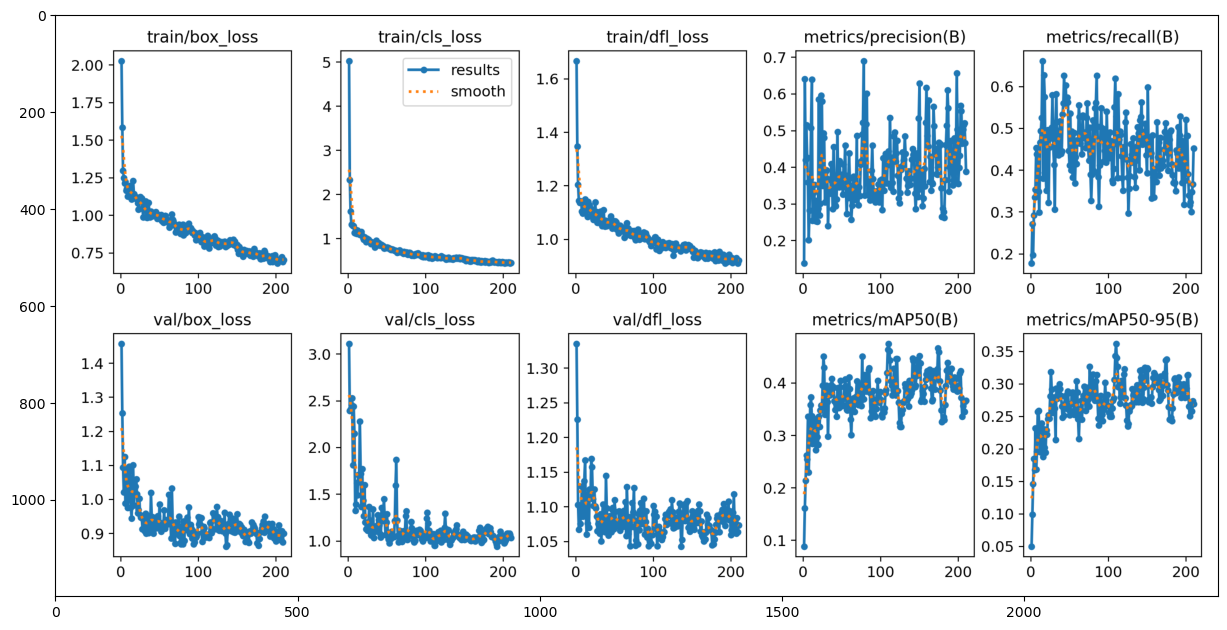

In [11]:
plt.figure(figsize=(15, 10))
results = img.imread(Path(save_dir, "results.png"))   
plt.imshow(results) 
plt.show()

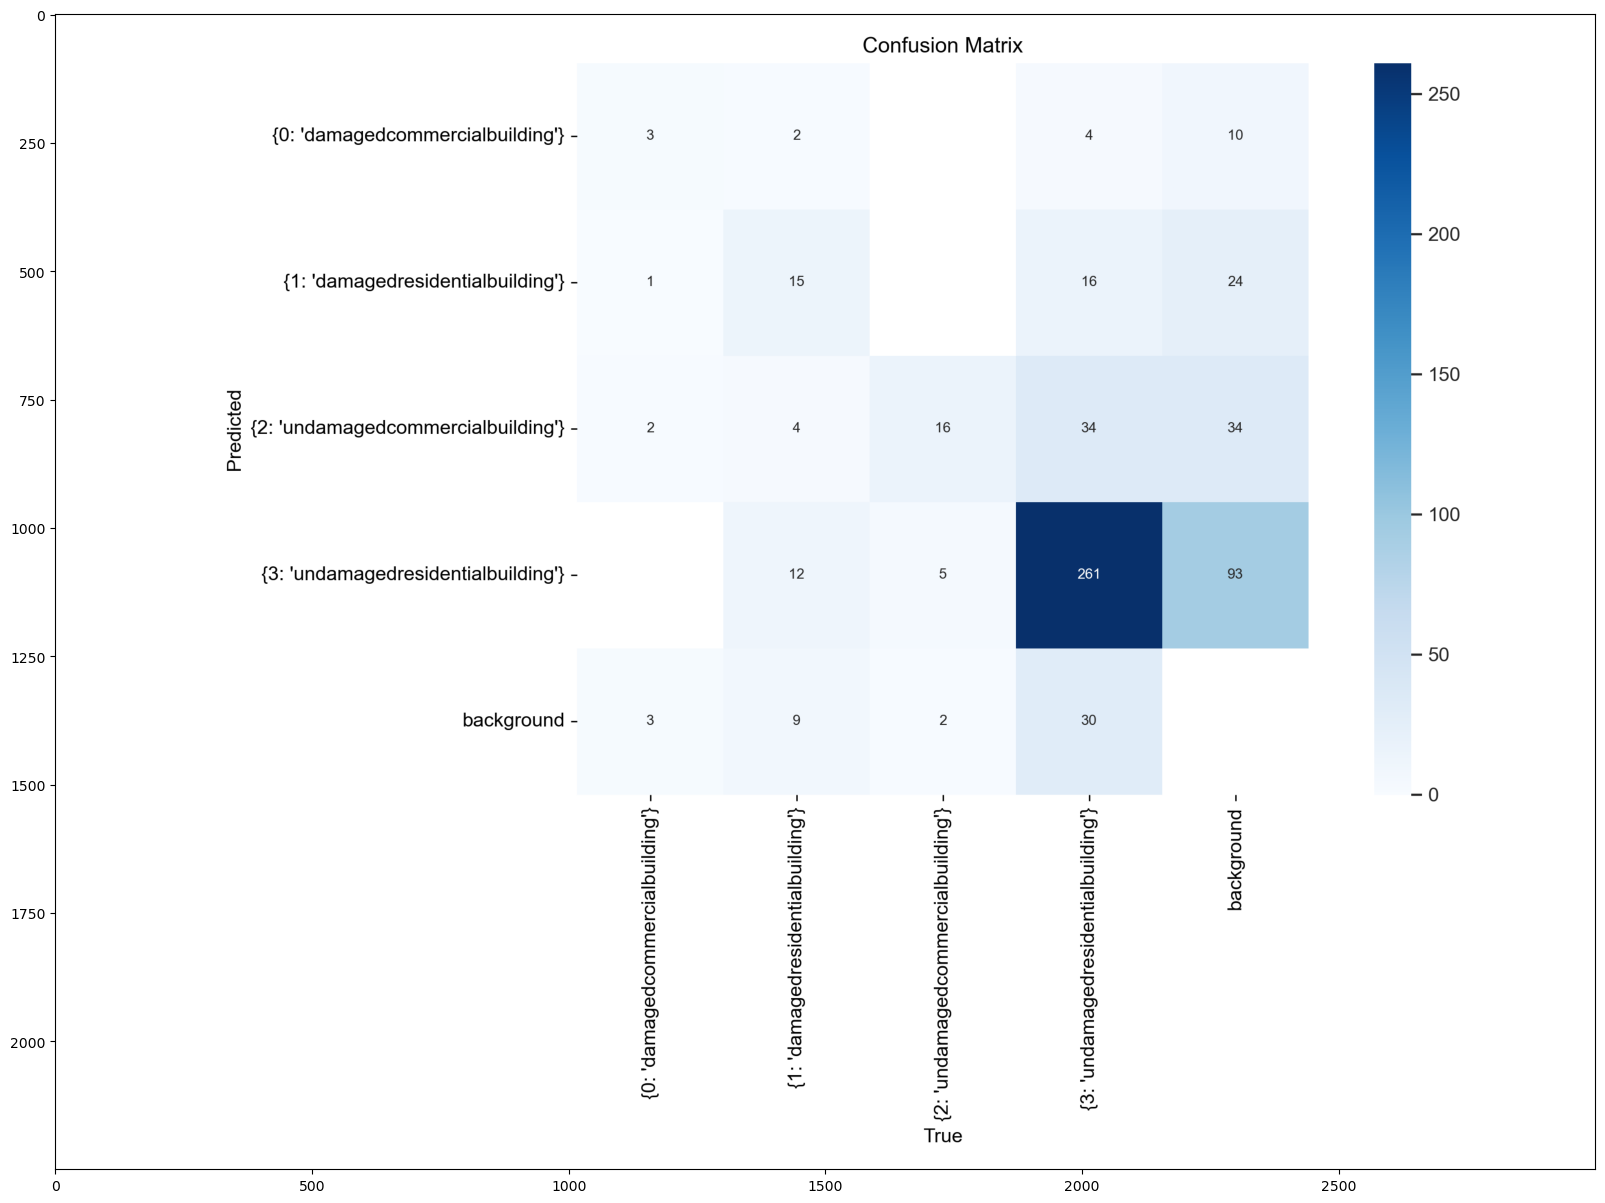

In [12]:
plt.figure(figsize=(20,15))  
# reading the image 
cf = img.imread(Path(save_dir, "confusion_matrix.png")) 
# displaying the image 
plt.imshow(cf) 
plt.show()

## Testing

In [13]:
results_dir = Path(save_dir, "submission_data"); os.makedirs(results_dir, exist_ok=True) # directory to store test output data
best_path = Path(save_dir, "weights/best.pt")

# Double-check with train_results.names
decoding_of_predictions = {0: 'damagedcommercialbuilding', 1: 'damagedresidentialbuilding', 2: 'undamagedcommercialbuilding', 3: 'undamagedresidentialbuilding'}

# Load the current best model
model = YOLO(best_path)

In [ ]:
test_results = model.val(
    split="test",
    imgsz=512,
    conf=0.25,
    iou=0.5,
    project=RUN_PATH,
)

In [14]:
test_results = model.predict(
    TEST_INPUTS_DIR,
    imgsz=512, iou=0.5, conf=0.25, 
    save=True, save_txt=True, project=RUN_PATH,
)


image 1/12 C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\datasets\storm-damage-detection\working\sdd\test\images\Validation_Post_Event_001_jpg.rf.816958fdf5bd6099b8a5e2b668d007e9.jpg: 512x512 3 {0: 'damagedcommercialbuilding'}s, 9 {1: 'damagedresidentialbuilding'}s, 8 {2: 'undamagedcommercialbuilding'}s, 19 {3: 'undamagedresidentialbuilding'}s, 46.9ms
image 2/12 C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\datasets\storm-damage-detection\working\sdd\test\images\Validation_Post_Event_002_jpg.rf.23111ea1920da9b374c3919e1f423dcd.jpg: 512x512 1 {0: 'damagedcommercialbuilding'}, 4 {1: 'damagedresidentialbuilding'}s, 2 {2: 'undamagedcommercialbuilding'}s, 9 {3: 'undamagedresidentialbuilding'}s, 25.3ms
image 3/12 C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\datasets\storm-damage-detection\working\sdd\test\images\Validation_Post_Event_003_jpg.rf.6f70407de0a1ee2cd0f1c8008387e696.jpg: 512x512 3 {0: 'dama

In [15]:
for r in test_results:
    confidences = r.boxes.conf.cpu().numpy().tolist()
    class_indices = r.boxes.cls.cpu().numpy().tolist()
    class_names = [decoding_of_predictions[int(clss_ix)] for clss_ix in class_indices]
    bounding_boxes = r.boxes.xyxy.cpu().numpy()

    # Check if bounding boxes, confidences and class names match
    if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
        print("Error: Number of bounding boxes, confidences, and class names should be the same.")
        continue
    
    text_file_name = os.path.splitext(os.path.basename(r.path))[0] # Get the img filename
    text_file_name = text_file_name.split(".")[0].rstrip("_jpg") # remove extra info in filename produced by roboflow

    # Creating a new .txt file for each image in the submission_directory
    with open(Path(results_dir, f"{text_file_name}.txt"), "w") as file:
        for i in range(len(bounding_boxes)):
            # Get coordinates of each bounding box
            left, top, right, bottom = bounding_boxes[i]
            # Write content to file in desired format
            file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
    print("Output files generated successfully.")
    

Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.


In [16]:
# Define your source directory and the destination where the zip file will be created
destination_zip = Path(results_dir.parent, "submission")

print("source", results_dir)
print("dest", destination_zip)

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', results_dir)

print(f"Directory {results_dir} has been successfully zipped into {destination_zip}.")

source C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train5\submission_data
dest C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train5\submission
Directory C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train5\submission_data has been successfully zipped into C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train5\submission.
